# Airbnb NYC

- Data Source :  http://insideairbnb.com/get-the-data.html

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

**Data Understanding and cleaning**

In [2]:
# Data from Airbnb for April 18,2020
nyc = pd.read_csv('Datasets/nyc_listings.csv')

In [3]:
nyc.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2060,Modern NYC,2259,Jenny,Manhattan,Washington Heights,40.85722,-73.93790,Private room,100,1,1,2008-09-22,0.01,1,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,3,48,2019-11-04,0.38,2,365
2,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,315,2020-03-14,4.68,1,233
3,5099,Large Cozy 1 BR Apartment In Midtown East,7322,Chris,Manhattan,Murray Hill,40.74767,-73.97500,Entire home/apt,200,3,78,2019-10-13,0.58,1,0
4,5121,BlissArtsSpace!,7356,Garon,Brooklyn,Bedford-Stuyvesant,40.68688,-73.95596,Private room,60,29,50,2019-12-02,0.38,1,365


In [5]:
nyc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50378 entries, 0 to 50377
Data columns (total 16 columns):
id                                50378 non-null int64
name                              50361 non-null object
host_id                           50378 non-null int64
host_name                         50370 non-null object
neighbourhood_group               50378 non-null object
neighbourhood                     50378 non-null object
latitude                          50378 non-null float64
longitude                         50378 non-null float64
room_type                         50378 non-null object
price                             50378 non-null int64
minimum_nights                    50378 non-null int64
number_of_reviews                 50378 non-null int64
last_review                       39675 non-null object
reviews_per_month                 39674 non-null float64
calculated_host_listings_count    50378 non-null int64
availability_365                  50378 non-null int64

In [6]:
# Checking for null values 
nyc.isnull().sum().to_frame(name='counts').query('counts > 0')

,counts
name,17
host_name,8
last_review,10703
reviews_per_month,10704


In [7]:
# Dropping identifier column name
nyc.drop(['name'], axis = 1,inplace = True)

In [8]:
nyc[['reviews_per_month','last_review']].head()

,reviews_per_month,last_review
0,0.01,2008-09-22
1,0.38,2019-11-04
2,4.68,2020-03-14
3,0.58,2019-10-13
4,0.38,2019-12-02


In [9]:
# dropping last review column as it is the date of last review.
nyc.drop(['last_review'], axis = 1,inplace = True)

In [10]:
# replacing null values in reviews per month to 0. This is a probably the rating
# replacing host name with unknown
nyc.fillna({'reviews_per_month':0, 'host_name': 'unknown'}, inplace=True)

In [11]:
nyc.columns

Index(['id', 'host_id', 'host_name', 'neighbourhood_group', 'neighbourhood',
       'latitude', 'longitude', 'room_type', 'price', 'minimum_nights',
       'number_of_reviews', 'reviews_per_month',
       'calculated_host_listings_count', 'availability_365'],
      dtype='object')

In [12]:
nyc[['price', 'minimum_nights',
       'number_of_reviews', 'reviews_per_month',
       'calculated_host_listings_count', 'availability_365']].describe()

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,50378.000000,50378.000000,50378.000000,50378.000000,50378.000000,50378.000000
mean,164.437453,7.760411,24.765116,0.932536,8.427210,124.629759
std,449.524005,21.595536,48.853847,1.433042,36.377227,138.998068
min,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000
25%,68.000000,1.000000,1.000000,0.030000,1.000000,0.000000
50%,105.000000,3.000000,5.000000,0.300000,1.000000,75.000000
75%,175.000000,5.000000,24.000000,1.280000,2.000000,255.000000
max,25000.000000,1250.000000,746.000000,63.040000,307.000000,365.000000


In [13]:
nyc[['neighbourhood_group','neighbourhood','room_type']].astype('object').describe()

,neighbourhood_group,neighbourhood,room_type
count,50378,50378,50378
unique,5,223,4
top,Manhattan,Williamsburg,Entire home/apt
freq,22384,3827,26230


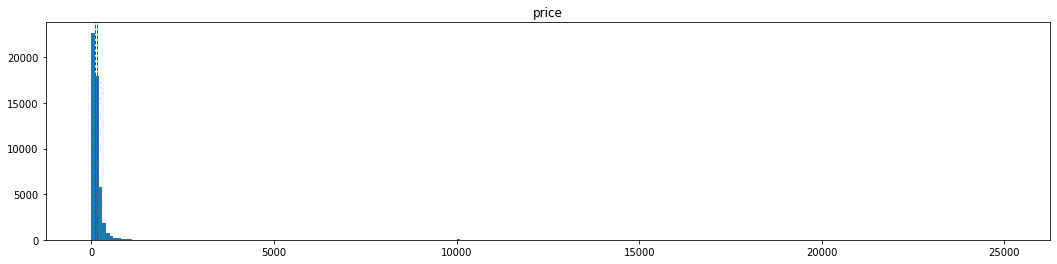

In [14]:
# Max price is $25,000 which is very high from the average price. Lets check the distribution of price
nyc.hist(column='price',bins=250, grid=False, figsize=(18,4))
plt.axvline(nyc['price'].mean(), color='r', linestyle='dashed', linewidth=1)
plt.axvline(nyc['price'].median(), color='g', linestyle='dashed', linewidth=1)

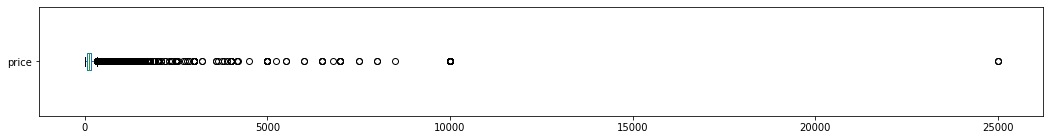

In [15]:
nyc['price'].plot(kind='box', vert=False,figsize=(18,2))

In [16]:
nyc['price'].mean()

164.43745285640557

In [17]:
nyc['price'].median()

105.0

The histogram and boxplot shows a skewed distribution with many outliers. mean is $ 165 and 75 percent of rentals are priced at $175.00. For this project I will remove high price rentals with rate above $ 500 per night

In [18]:
(nyc['price'] > 500 ).value_counts()

False    49215
True      1163
Name: price, dtype: int64

In [19]:
nyc.drop(nyc.loc[nyc['price']> 500].index, inplace=True)

In [20]:
# Some prices are listed as 0 
(nyc['price'] == 0 ).value_counts()

False    49202
True        13
Name: price, dtype: int64

In [21]:
#deleting listings with price = 0. Price should be greater than 0
nyc.drop(nyc.loc[nyc['price']==0].index, inplace=True)

In [22]:
nyc['price'].mean()

129.79204097394415

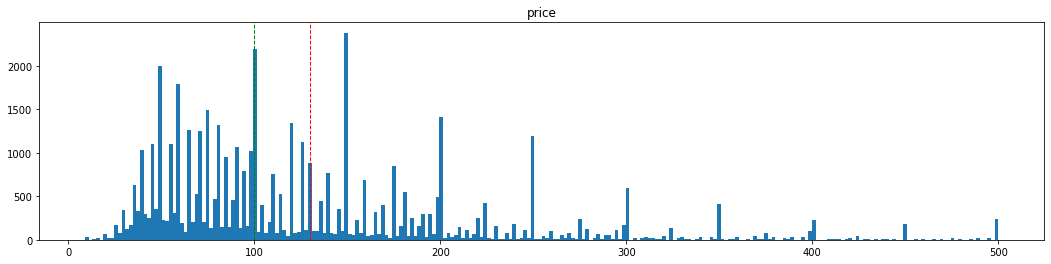

In [23]:
# After removing the listings with price over 1000 the mean and median are much closer
nyc.hist(column='price',bins=250, grid=False, figsize=(18,4))
plt.axvline(nyc['price'].mean(), color='r', linestyle='dashed', linewidth=1)
plt.axvline(nyc['price'].median(), color='g', linestyle='dashed', linewidth=1)

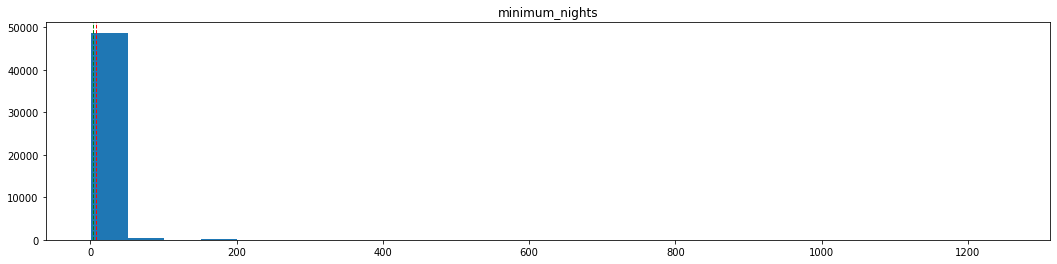

In [24]:
# Max minimum nights is 1200, lets check the distribution for minimun nights
nyc.hist(column='minimum_nights',bins=25, grid=False, figsize=(18,4))
plt.axvline(nyc['minimum_nights'].mean(), color='r', linestyle='dashed', linewidth=1)
plt.axvline(nyc['minimum_nights'].median(), color='g', linestyle='dashed', linewidth=1)

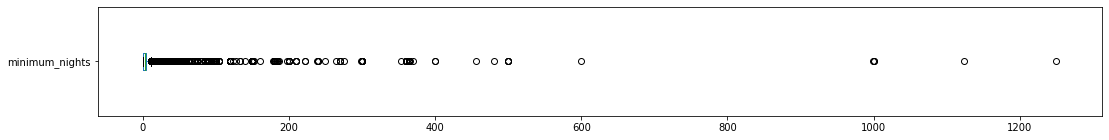

In [25]:
nyc['minimum_nights'].plot(kind='box', vert=False,figsize=(18,2))

In [26]:
(nyc['minimum_nights'] > 50).value_counts()

False    48689
True       513
Name: minimum_nights, dtype: int64

In [27]:
nyc.drop(nyc.loc[nyc['minimum_nights'] > 50].index, inplace=True)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a1aacda10>]],
      dtype=object)

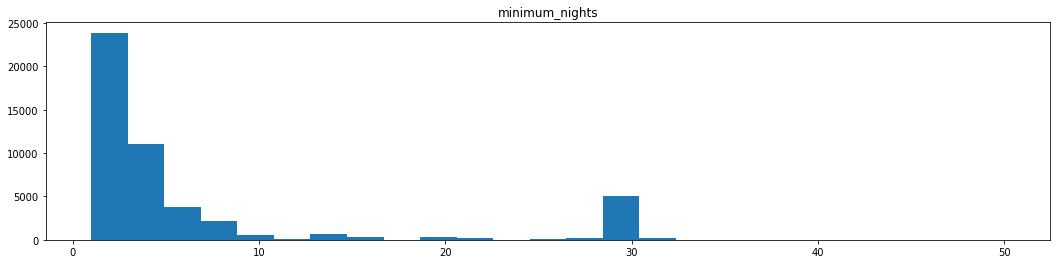

In [28]:
nyc.hist(column='minimum_nights',bins=25, grid=False, figsize=(18,4))

**Data Exploration**

In [29]:
num_cols = nyc[['price', 'minimum_nights',
       'number_of_reviews', 'reviews_per_month',
       'calculated_host_listings_count', 'availability_365']]

(6.0, 0.0)

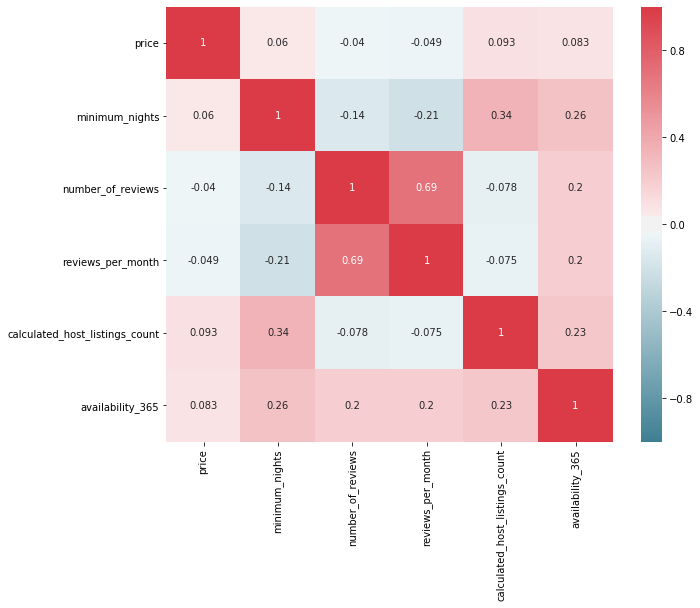

In [30]:
plt.figure(figsize=(10, 8))
corr = num_cols.corr()
axis=sns.heatmap(corr, annot= True, vmin=-1,vmax=1,xticklabels=corr.columns, yticklabels=corr.columns, cmap=sns.diverging_palette(220, 10, as_cmap=True))
bottom, top = axis.get_ylim()
axis.set_ylim(bottom + 0.5, top - 0.5)

Reviews per month had high correlation with number of reviews. 

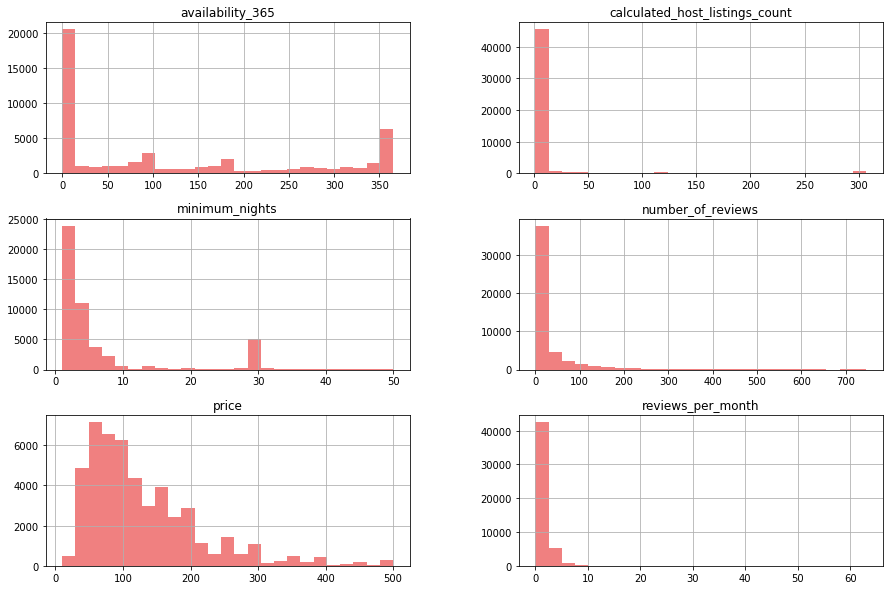

In [31]:
num_cols.hist(bins=25, figsize=(15,10),color = 'lightcoral')
plt.show()

**Average prices for each room type in each of the neighbourhoods of the 5 neighbourhoog groups**

In [33]:
nyc_group = nyc.groupby(['neighbourhood_group','neighbourhood','room_type'])['price'].mean().reset_index()

In [34]:
manhattan  = nyc_group[nyc_group['neighbourhood_group'] == 'Manhattan'].reset_index(drop=True)

Text(0.5, 1.0, 'Average room prices in Manhattan neighborhood')

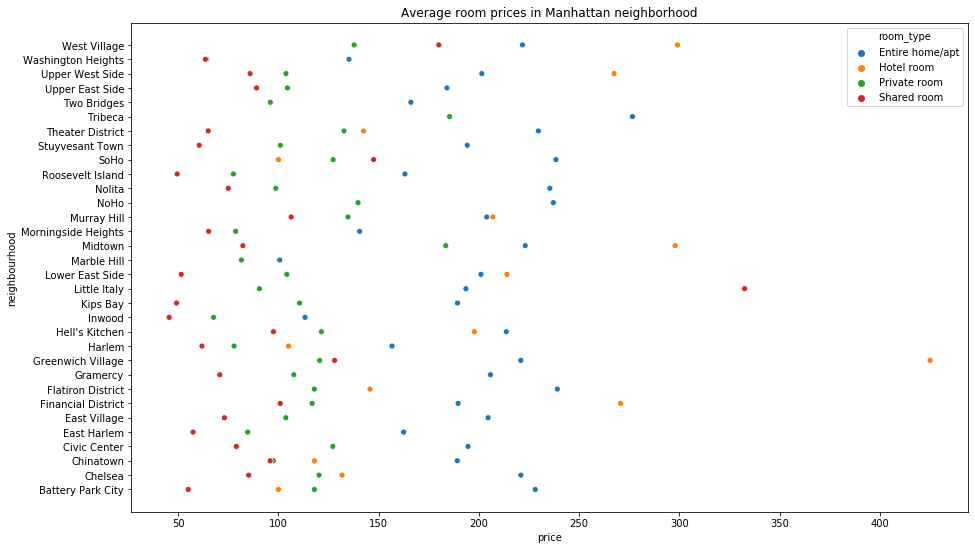

In [36]:
plt.subplots(figsize=(15,9))
sns.scatterplot(x='price', y='neighbourhood',
                hue = 'room_type',
                data=manhattan).set_title('Average room prices in Manhattan neighborhood')

Text(0.5, 1.0, 'Average room prices in Manhattan')

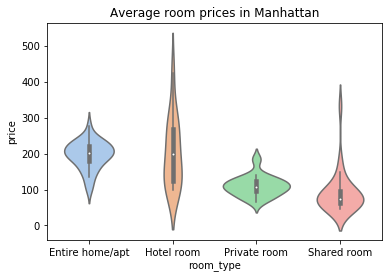

In [37]:
sns.violinplot(x="room_type", y="price", data=manhattan, palette="pastel").set_title('Average room prices in Manhattan')

Hotel room is by most expensive in many neighbourhoods. 

In [38]:
Brooklyn  = nyc_group[nyc_group['neighbourhood_group'] == 'Brooklyn'].reset_index(drop=True)

Text(0.5, 1.0, 'Average room prices in Manhattan neighborhood')

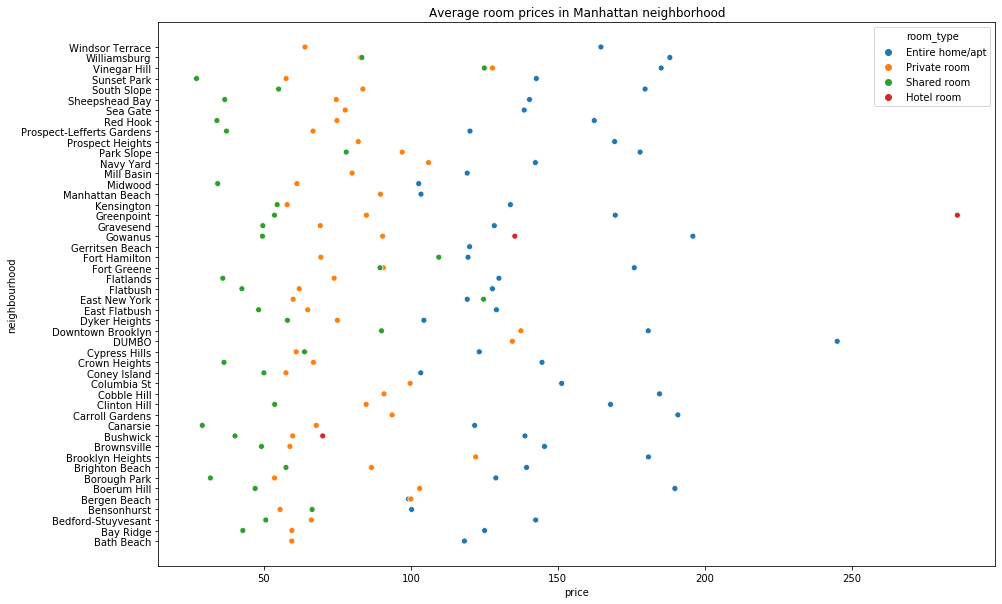

In [39]:
plt.subplots(figsize=(15,10))
sns.scatterplot(x='price', y='neighbourhood',
                hue = 'room_type',
                data=Brooklyn).set_title('Average room prices in Manhattan neighborhood')

In [40]:
Queens  = nyc_group[nyc_group['neighbourhood_group'] == 'Queens'].reset_index(drop=True)

Text(0.5, 1.0, 'Average room prices in Manhattan neighborhood')

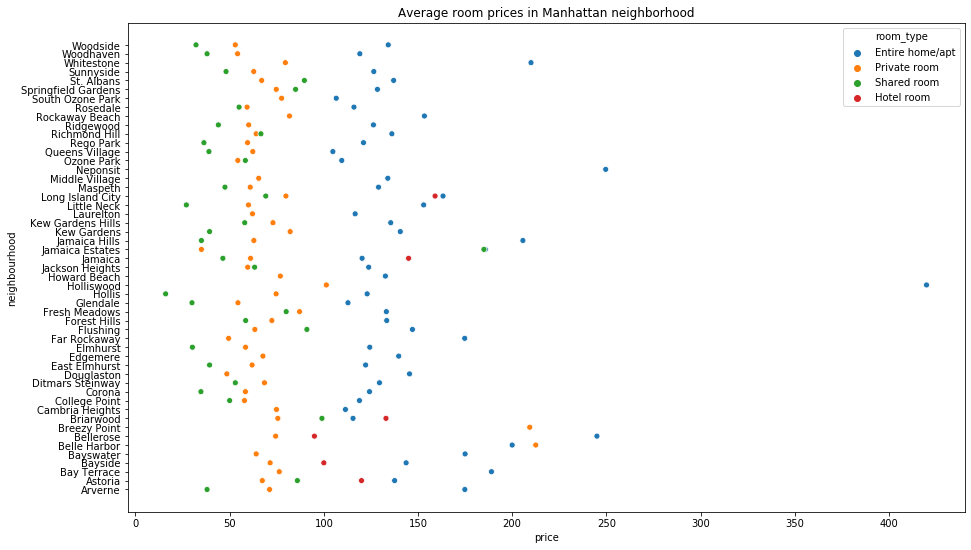

In [41]:
plt.subplots(figsize=(15,9))
sns.scatterplot(x='price', y='neighbourhood',
                hue = 'room_type',
                data=Queens).set_title('Average room prices in Manhattan neighborhood')

In [42]:
Bronx  = nyc_group[nyc_group['neighbourhood_group'] == 'Bronx'].reset_index(drop=True)

Text(0.5, 1.0, 'Average room prices in Manhattan neighborhood')

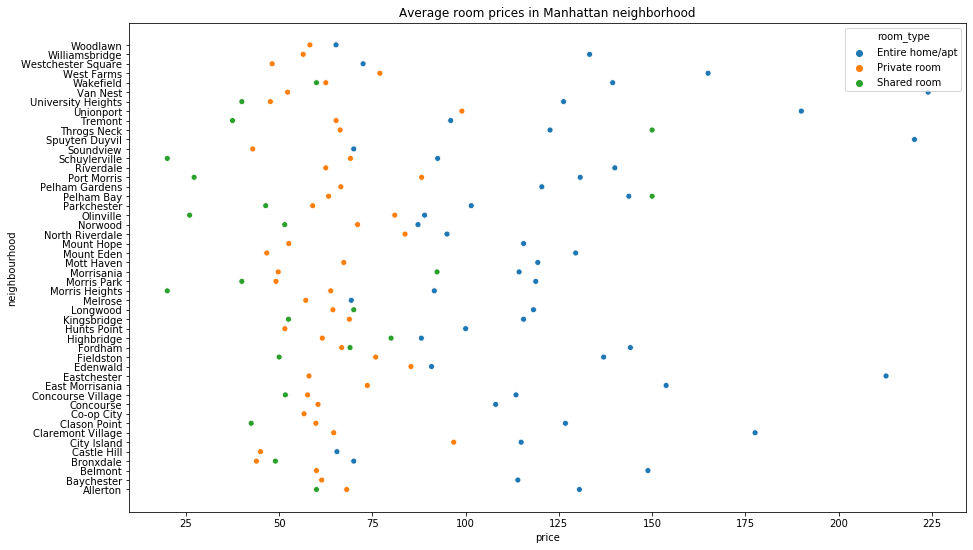

In [43]:
plt.subplots(figsize=(15,9))
sns.scatterplot(x='price', y='neighbourhood',
                hue = 'room_type',
                data=Bronx).set_title('Average room prices in Manhattan neighborhood')

In [43]:
Staten_Island = nyc_group[nyc_group['neighbourhood_group'] == 'Staten Island'].reset_index(drop=True)

Text(0.5, 1.0, 'Average room prices in Manhattan neighborhood')

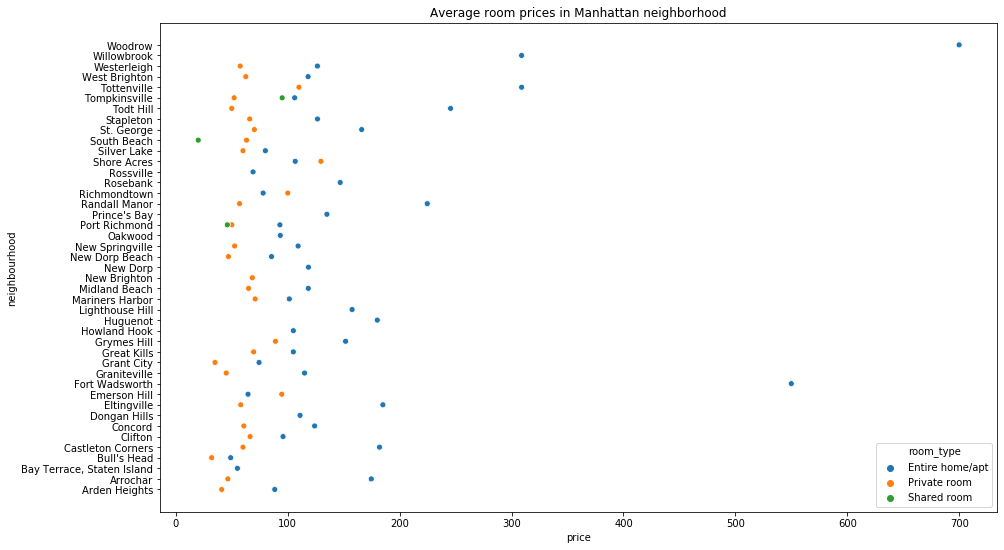

In [44]:
plt.subplots(figsize=(15,9))
sns.scatterplot(x='price', y='neighbourhood',
                hue = 'room_type',
                data=Staten_Island).set_title('Average room prices in Manhattan neighborhood')

In [45]:
pivot = pd.pivot_table(nyc_group, values=['price'], index=['neighbourhood_group','room_type'])

In [47]:
pivot

price
neighbourhood_group room_type                  
Bronx               Entire home/apt  121.557200
                    Private room      63.553623
                    Shared room       58.436364
Brooklyn            Entire home/apt  146.102606
                    Hotel room       163.789474
                    Private room      79.624138
                    Shared room       56.896884
Manhattan           Entire home/apt  196.061169
                    Hotel room       201.430020
                    Private room     110.421707
                    Shared room       90.859797
Queens              Entire home/apt  149.201269
                    Hotel room       125.344444
                    Private room      72.203280
                    Shared room       56.621434
Staten Island       Entire home/apt  125.293027
                    Private room      64.313934
                    Shared room       53.666667

In [46]:
pivot.sort_values('price',axis=0,ascending=False)

price
neighbourhood_group room_type                  
Manhattan           Hotel room       201.430020
                    Entire home/apt  196.061169
Brooklyn            Hotel room       163.789474
Queens              Entire home/apt  149.201269
Brooklyn            Entire home/apt  146.102606
Queens              Hotel room       125.344444
Staten Island       Entire home/apt  125.293027
Bronx               Entire home/apt  121.557200
Manhattan           Private room     110.421707
                    Shared room       90.859797
Brooklyn            Private room      79.624138
Queens              Private room      72.203280
Staten Island       Private room      64.313934
Bronx               Private room      63.553623
                    Shared room       58.436364
Brooklyn            Shared room       56.896884
Queens              Shared room       56.621434
Staten Island       Shared room       53.666667

The above pivot tables shows the average price of each room type for all neighbourhood groups. Mahanttan is the most expensive for all room types

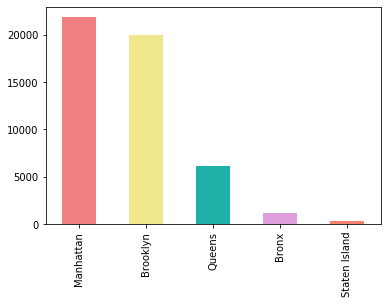

In [47]:
colors = ['lightcoral','khaki','lightseagreen','plum','salmon','lavender']
nyc["neighbourhood_group"].value_counts().plot(kind='bar',color=colors)

Manhattan has the most listings followed by Brookyn. Queens , Bronx and Staten Island has relatively less listings. 

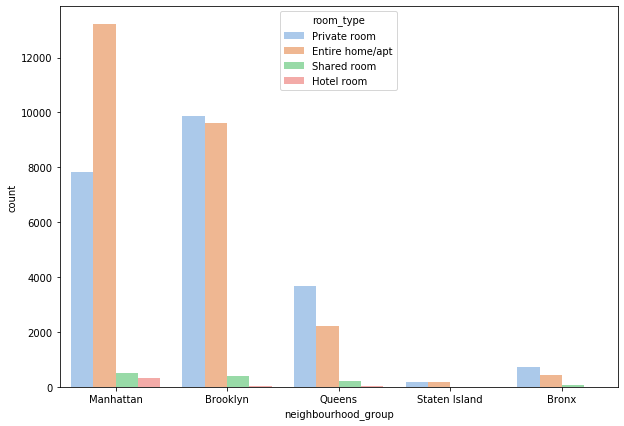

In [48]:
plt.figure(figsize=(10,7))
sns.countplot(nyc['neighbourhood_group'],hue=nyc['room_type'],palette="pastel")

Most listings are for Entire home/apt and Private room in all neighbourhood groups

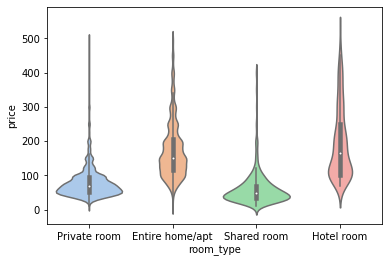

In [49]:
sns.violinplot(x="room_type", y="price", data=nyc[nyc.price <500], palette="pastel")

Hotel rooms are more pricey compared to the rest. 

In [50]:
# how many Hosts ?
nyc.host_id.nunique()

37182

Total of 37182 hosts have listings on Airbnb in NYC. 

In [51]:
# Top 15 host
top_15_host = nyc['host_name'].value_counts().head(15)

In [52]:
top_15_host

Michael         403
David           370
Sonder (NYC)    305
Blueground      295
John            272
Alex            254
Daniel          246
Maria           228
Sarah           206
Mike            205
Jessica         196
Anna            180
Chris           176
Andrew          171
Laura           169
Name: host_name, dtype: int64

Text(0.5, 0, 'Host Name')

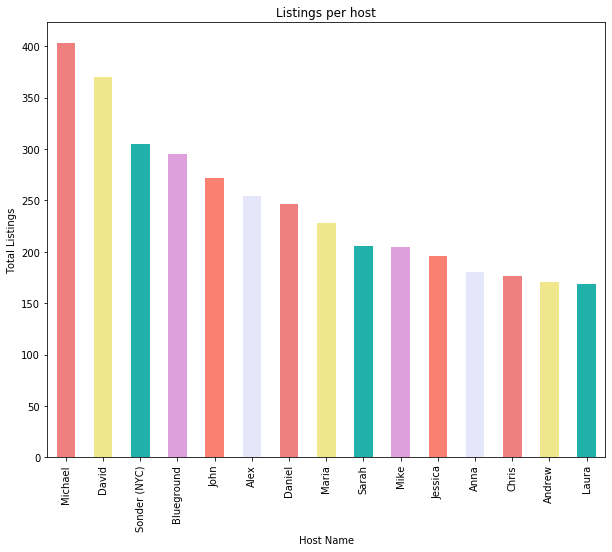

In [53]:
# Listings per host
plt.figure(figsize=(10, 8))
colors = ['lightcoral','khaki','lightseagreen','plum','salmon','lavender']
top_15_host_plot = top_15_host.plot(kind='bar', color = colors)
top_15_host_plot.set_title('Listings per host')
top_15_host_plot.set_ylabel('Total Listings')
top_15_host_plot.set_xlabel('Host Name')

Michael has the most listings.

In [49]:
nyc['Host_counts'] = nyc.groupby(['host_name'])['neighbourhood_group'].transform('count')

In [58]:
# Last host in the top fifteen has total 169 listings
top_hosts  = nyc[nyc['Host_counts'] >= 169].reset_index(drop=True)

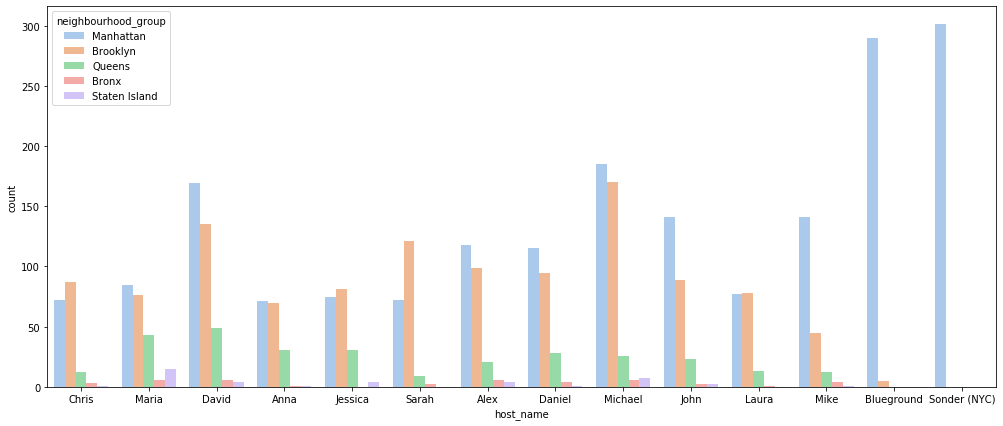

In [57]:
plt.figure(figsize=(17,7))
sns.countplot(top_hosts['host_name'],hue=top_hosts['neighbourhood_group'],palette="pastel")

Michael and David has listings in all 5 neighbourhoods. Sounders has listings only in Manhattan with top listings in Mahattan. Most of the hosts have listings in Mahanttan, Brooklyn and Queens. 